**Реализация**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from google.colab import drive

drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
data = pd.read_csv("/content/drive/My Drive/CSV/Батч-1.csv")
data.head()

,hid,дата оформления,индекс отправителя,индекс получателя,вес (гр),"стоимость (руб,коп)",сумма ОЦ (руб),сумма НП (руб),безбланковая отправка,бандероль,ускоренное,международное,с объявл. ценностью,с налож. платежом,с описью вложений,отметка 'Осторожно',sms для отправителя,sms для получателя
0,17279630-2e29-4a0d-8f96-f3c932e6bbcb,2020-07-05 00:00:26.036000,109469,107241,100.0,173.0,NaN,NaN,False,False,True,False,False,False,False,NaN,False,False
1,16971e43-728a-4f66-a93c-3678aa8433cd,2020-07-05 00:03:17.229000,390039,125284,1100.0,238.0,NaN,NaN,True,False,False,False,False,False,False,NaN,False,False
2,16d739fa-ca72-4b12-b8a1-ae5d91df945f,2020-07-05 00:11:47.671000,111250,670033,100.0,173.0,NaN,NaN,True,False,True,False,False,False,False,NaN,False,False
3,8182829,2020-07-05 00:12:50.965000,105173,183035,2262.0,363.0,NaN,NaN,False,False,False,False,False,False,False,NaN,False,False
4,1645b790-f6f9-4c3f-b92b-eae34e781784,2020-07-05 00:13:05.474000,195197,184209,1905.0,338.0,NaN,NaN,False,False,False,False,False,False,False,NaN,False,False


In [61]:
data_without_form = data.drop('дата оформления', axis = 1) #Убрали дату оформления
print(data_without_form[data_without_form['международное'] == True].size) # Международного не было
print(data_without_form[data_without_form['безбланковая отправка'] == True].size) # Международного не было
print(data_without_form['безбланковая отправка'] == True)


data_no_nan = data_without_form.fillna(0) #Убрали все NaN
data_no_nan

0
2353514
0         False
1          True
2          True
3         False
4         False
          ...  
188465     True
188466    False
188467     True
188468     True
188469     True
Name: безбланковая отправка, Length: 188470, dtype: bool


,hid,индекс отправителя,индекс получателя,вес (гр),"стоимость (руб,коп)",сумма ОЦ (руб),сумма НП (руб),безбланковая отправка,бандероль,ускоренное,международное,с объявл. ценностью,с налож. платежом,с описью вложений,отметка 'Осторожно',sms для отправителя,sms для получателя
0,17279630-2e29-4a0d-8f96-f3c932e6bbcb,109469,107241,100.0,173.0,0.0,0.0,False,False,True,False,False,False,False,0,False,False
1,16971e43-728a-4f66-a93c-3678aa8433cd,390039,125284,1100.0,238.0,0.0,0.0,True,False,False,False,False,False,False,0,False,False
2,16d739fa-ca72-4b12-b8a1-ae5d91df945f,111250,670033,100.0,173.0,0.0,0.0,True,False,True,False,False,False,False,0,False,False
3,8182829,105173,183035,2262.0,363.0,0.0,0.0,False,False,False,False,False,False,False,0,False,False
4,1645b790-f6f9-4c3f-b92b-eae34e781784,195197,184209,1905.0,338.0,0.0,0.0,False,False,False,False,False,False,False,0,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188465,169b12c7-6ed1-4713-92a7-07c87e8fd91b,140013,196244,1000.0,288.0,0.0,0.0,True,False,False,False,False,False,False,0,False,False
188466,799282,630133,601505,300.0,350.0,0.0,0.0,False,False,True,False,False,False,False,0,False,False
188467,171c313b-96a4-4439-be13-40ce794139c3,680017,680017,100.0,293.0,0.0,0.0,True,False,False,False,False,False,False,0,False,False
188468,171c313b-96a4-4439-be13-40ce794139c3,680017,680017,100.0,293.0,0.0,0.0,True,False,False,False,False,False,False,0,False,False


In [5]:
from sklearn.preprocessing import StandardScaler
import numpy as np

data_in_array = np.array(data_no_nan.values[:, 3:]) #Сформировали список списков по строкам
data_in_array

#Clus_dataSet = StandardScaler().fit_transform(data_without_nan) #Нормирует данные 
#Clus_dataSet

array([[100.0, 173.0, 0.0, ..., 0, False, False],
       [1100.0, 238.0, 0.0, ..., 0, False, False],
       [100.0, 173.0, 0.0, ..., 0, False, False],
       ...,
       [100.0, 293.0, 0.0, ..., 0, False, False],
       [100.0, 293.0, 0.0, ..., 0, False, False],
       [100.0, 293.0, 0.0, ..., 0, False, False]], dtype=object)

**Деление по кластерам в лоб**

**3 кластера**


In [27]:
from sklearn.cluster import KMeans
clusterNum = 3
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12) # Способ определения центроид, кол-во кластеров, кол-во итераций алгоритма 
k_means.fit(data_in_array)
labels3 = k_means.labels_
print(labels3)

[0 0 0 ... 0 0 0]


Каждому пользователю в таблице присвоили номер кластера



In [28]:
data_no_nan3 = data_no_nan
data_no_nan3["Кластер"] = labels3
data_no_nan3.head()

,hid,индекс отправителя,индекс получателя,вес (гр),"стоимость (руб,коп)",сумма ОЦ (руб),сумма НП (руб),безбланковая отправка,бандероль,ускоренное,международное,с объявл. ценностью,с налож. платежом,с описью вложений,отметка 'Осторожно',sms для отправителя,sms для получателя,Кластер
0,17279630-2e29-4a0d-8f96-f3c932e6bbcb,109469,107241,100.0,173.0,0.0,0.0,False,False,True,False,False,False,False,0,False,False,0
1,16971e43-728a-4f66-a93c-3678aa8433cd,390039,125284,1100.0,238.0,0.0,0.0,True,False,False,False,False,False,False,0,False,False,0
2,16d739fa-ca72-4b12-b8a1-ae5d91df945f,111250,670033,100.0,173.0,0.0,0.0,True,False,True,False,False,False,False,0,False,False,0
3,8182829,105173,183035,2262.0,363.0,0.0,0.0,False,False,False,False,False,False,False,0,False,False,0
4,1645b790-f6f9-4c3f-b92b-eae34e781784,195197,184209,1905.0,338.0,0.0,0.0,False,False,False,False,False,False,False,0,False,False,0


In [29]:
data_no_nan3.groupby('Кластер').mean() # Среднее значение для каждого кластера по каждой

,индекс отправителя,индекс получателя,вес (гр),"стоимость (руб,коп)",сумма ОЦ (руб),сумма НП (руб),безбланковая отправка,ускоренное,международное,с налож. платежом
Кластер,,,,,,,,,,
0,347011.677912,396258.257718,973.530812,312.270921,186.992818,120.897570,0.702382,0.195147,0.0,0.071365
1,290797.643196,463186.045013,1243.136830,597.670608,5740.733636,5310.160121,0.813958,0.221695,0.0,0.966618
2,377080.577793,414146.278913,7633.744159,834.945957,257.765007,38.883468,0.888754,0.000000,0.0,0.017283


0

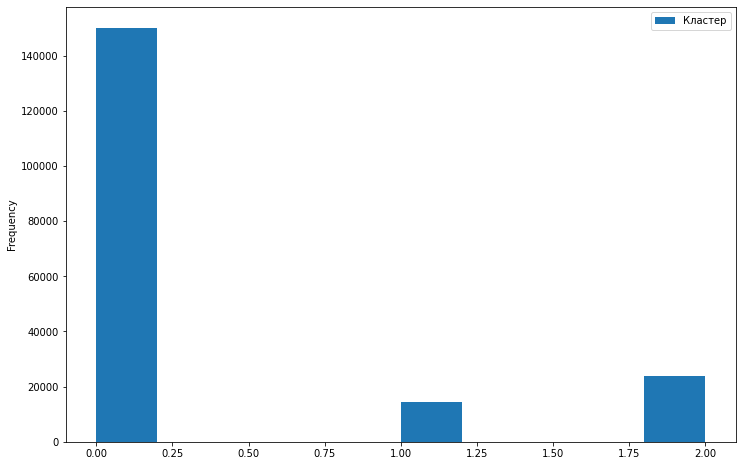

In [46]:
data_no_nan3[['вес (гр)', 'Кластер']].plot(kind='hist', x='вес (гр)', y ='Кластер',figsize=(12,8))
data_no_nan3[data_no_nan3['международное'] == True].size

**Количество людей в каждом кластере**

Количество людей в кластере 0:  150102
Количество людей в кластере 1:  23839
Количество людей в кластере 2:  14529


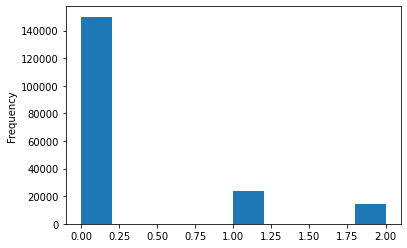

In [10]:
cluster_column = data_no_nan3['Кластер']
cluster0 = cluster_column[cluster_column == 0]
print('Количество людей в кластере 0: ', cluster0.size)

cluster1 = cluster_column[cluster_column == 1]
print('Количество людей в кластере 1: ', cluster1.size)

cluster2 = cluster_column[cluster_column == 2]
print('Количество людей в кластере 2: ', cluster2.size)

cluster_column.plot(kind = 'hist')

**4 кластера**

In [11]:
clusterNum = 4
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12) # Способ определения центроид, кол-во кластеров, кол-во итераций алгоритма 
k_means.fit(data_in_array)
labels4 = k_means.labels_
print(labels4)

[3 3 3 ... 3 3 3]


Каждому пользователю в таблице присвоили номер кластера

In [12]:
data_no_nan4 = data_no_nan
data_no_nan4["Кластер"] = labels4
data_no_nan4.head()

,hid,индекс отправителя,индекс получателя,вес (гр),"стоимость (руб,коп)",сумма ОЦ (руб),сумма НП (руб),безбланковая отправка,бандероль,ускоренное,международное,с объявл. ценностью,с налож. платежом,с описью вложений,отметка 'Осторожно',sms для отправителя,sms для получателя,Кластер
0,17279630-2e29-4a0d-8f96-f3c932e6bbcb,109469,107241,100.0,173.0,0.0,0.0,False,False,True,False,False,False,False,0,False,False,3
1,16971e43-728a-4f66-a93c-3678aa8433cd,390039,125284,1100.0,238.0,0.0,0.0,True,False,False,False,False,False,False,0,False,False,3
2,16d739fa-ca72-4b12-b8a1-ae5d91df945f,111250,670033,100.0,173.0,0.0,0.0,True,False,True,False,False,False,False,0,False,False,3
3,8182829,105173,183035,2262.0,363.0,0.0,0.0,False,False,False,False,False,False,False,0,False,False,3
4,1645b790-f6f9-4c3f-b92b-eae34e781784,195197,184209,1905.0,338.0,0.0,0.0,False,False,False,False,False,False,False,0,False,False,3


In [13]:
data_no_nan4.groupby('Кластер').mean() # Среднее значение для каждого кластера по каждой

,индекс отправителя,индекс получателя,вес (гр),"стоимость (руб,коп)",сумма ОЦ (руб),сумма НП (руб),безбланковая отправка,ускоренное,международное,с налож. платежом
Кластер,,,,,,,,,,
0,290534.426921,462965.653040,1236.319153,597.243232,5746.073667,5323.317452,0.813862,0.221139,0.0,0.967351
1,387363.986626,423133.935869,10758.639772,1167.714320,358.522473,71.886538,0.898706,0.000000,0.0,0.025104
2,368946.844643,407157.387243,4592.601784,553.442020,184.134933,23.773212,0.847864,0.000000,0.0,0.015929
3,345026.799810,395390.036849,734.864703,296.683232,190.841262,131.284104,0.691781,0.214549,0.0,0.076874


Количество людей в кластере 0:  14457
Количество людей в кластере 1:  9122
Количество людей в кластере 2:  28251
Количество людей в кластере 3:  28251


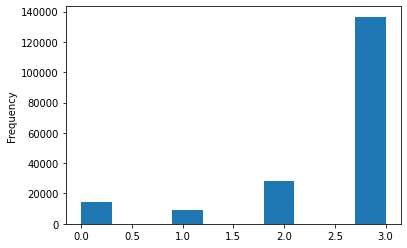

In [14]:
cluster_column = data_no_nan4['Кластер']
cluster0 = cluster_column[cluster_column == 0]
print('Количество людей в кластере 0: ', cluster0.size)

cluster1 = cluster_column[cluster_column == 1]
print('Количество людей в кластере 1: ', cluster1.size)

cluster2 = cluster_column[cluster_column == 2]
print('Количество людей в кластере 2: ', cluster2.size)

cluster3 = cluster_column[cluster_column == 3]
print('Количество людей в кластере 3: ', cluster2.size)

cluster_column.plot(kind = 'hist')

**5 кластеров**

In [15]:
clusterNum = 5
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12) # Способ определения центроид, кол-во кластеров, кол-во итераций алгоритма 
k_means.fit(data_in_array)
labels5 = k_means.labels_
print(labels5)

[0 0 0 ... 0 0 0]


Каждому пользователю в таблице присвоили номер кластера

In [16]:
data_no_nan5 = data_no_nan
data_no_nan5["Кластер"] = labels
data_no_nan5.head()

NameError: ignored

In [ ]:
data_no_nan5.groupby('Кластер').mean()

In [ ]:
cluster_column = data_no_nan5['Кластер']
cluster0 = cluster_column[cluster_column == 0]
print('Количество людей в кластере 0: ', cluster0.size)

cluster1 = cluster_column[cluster_column == 1]
print('Количество людей в кластере 1: ', cluster1.size)

cluster2 = cluster_column[cluster_column == 2]
print('Количество людей в кластере 2: ', cluster2.size)

cluster3 = cluster_column[cluster_column == 3]
print('Количество людей в кластере 3: ', cluster2.size)

cluster3 = cluster_column[cluster_column == 4]
print('Количество людей в кластере 3: ', cluster2.size)

cluster_column.plot(kind = 'hist')

**Выявление корреляции между определёнными признаками**

Для третьего кластера явно выделяется взаимосвязь стоимости, суммы ОЦ и суммы НП, без бланков отправляет меньше, чаще ускоренное - возможно он предприниматель 

In [ ]:
HID_str = "hid"
OC_str = "с объявл. ценностью"
NP_str = "с налож. платежом"
OP_str = "с описью вложений"
SMS_snd_str = "sms для отправителя"
SMS_rcv_str = "sms для получателя"

with_OC_arr = data_no_nan[OC_str]                   # Получили значения по столбцу OC
with_OC_arr_true = with_OC_arr[with_OC_arr == True] # Получили значения по столбцу ОС, равному TRUE
print(with_OC_arr_true.size) #48477

with_OP_arr = data_no_nan[OP_str]
with_OP_arr_true = with_OP_arr[with_OP_arr == True] # Все, кто отправляет с описью вложений  
print(with_OP_arr_true.size) 

with_NP_arr = data_no_nan[NP_str]
with_NP_arr_true = with_NP_arr[with_NP_arr == True] # Все, кто отправляет с наложенным платежом
print(with_NP_arr_true.size) 

with_snd_arr = data_no_nan[SMS_snd_str]
with_snd_arr_true = with_snd_arr[with_snd_arr == True] # Все, кто отправляет с смс для отправителя
print(with_snd_arr_true.size) 

with_rcv_arr = data_no_nan[[SMS_rcv_str]]
with_rcv_arr_true = with_rcv_arr[with_rcv_arr == True] # Все, кто отправляет с смс для получателя
print(with_rcv_arr_true.size) 

with_NP_arr_true == with_rcv_arr_true

Мы сейчас проверяем гипотезу такую, кто отправляет НП (а значит и ОЦ) и СМС для получателя - предприниматель. Найдём корреляцию между столбцами


**legacy**

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
data_no_nan[['hid', 'Кластер']].plot(kind='scatter', x='hid', y='Кластер', figsize=(12,8))